## DATA ANALYSIS

In [1]:
import s3fs; import xarray as xr; import numpy as np
import pandas as pd; import scipy
import matplotlib.pyplot as plt; import cartopy.crs as ccrs
import netCDF4 as nc; import datetime as dt
import ocetrac

import dask.array as da
import warnings; import expectexception
warnings.filterwarnings('ignore')
import intake; import pprint

import random
import nc_time_axis
import cftime

In [2]:
import seaborn as sns

sns.set_theme(style="darkgrid")

### Ensemble Mean
- North Pacific Ocean

In [3]:
lat_lim_less = 30.
lat_lim_great = 60.

lon_lim_less = 200.
lon_lim_great = 250.

In [4]:
ensemble_mean = xr.open_dataset('/glade/work/cassiacai/ensemble_mean.nc')

ensemble_mean_new = ensemble_mean.where((ensemble_mean.lat >= lat_lim_less) & (ensemble_mean.lat <= lat_lim_great) 
                        &(ensemble_mean.lon >= lon_lim_less) & (ensemble_mean.lon <= lon_lim_great),drop=True)
ensemble_mean_new.SST.shape

(1980, 32, 41)

In [5]:
ensemble_mean_new_nans = ensemble_mean_new.where(ensemble_mean_new != 0)

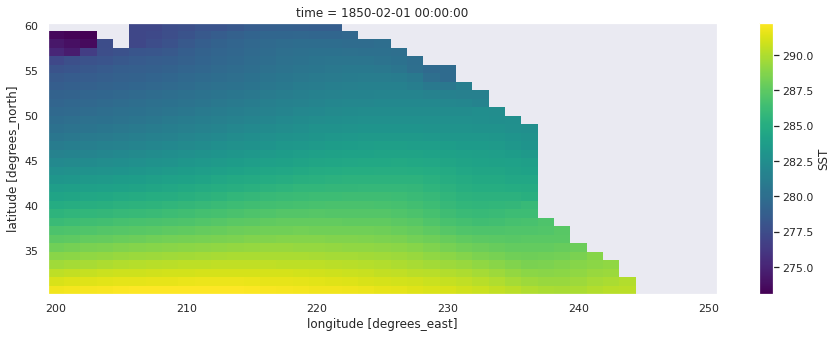

In [6]:
plt.rcParams["figure.figsize"] = (15,5)

i = 0
# plt.pcolormesh(ensemble_mean_new_nans.SST[i,:,:])
ensemble_mean_new_nans.SST[i,:,:].plot()

In [7]:
# ensemble_mean_new_nans.time

In [8]:
ensemble_mean_SST = []; ensemble_max_SST = []; ensemble_min_SST = []; time_scale = []; time_month = []
for i in range(0,1980,12):
    time_scale.append(i)
    time_month.append(ensemble_mean_new_nans.time[i])
    timed_SST = ensemble_mean_new_nans.SST[i,:,:]
    mean = np.nanmean(timed_SST); ensemble_mean_SST.append(mean)
    maximum = np.nanmax(timed_SST); ensemble_max_SST.append(maximum)
    minimum = np.nanmin(timed_SST); ensemble_min_SST.append(minimum)

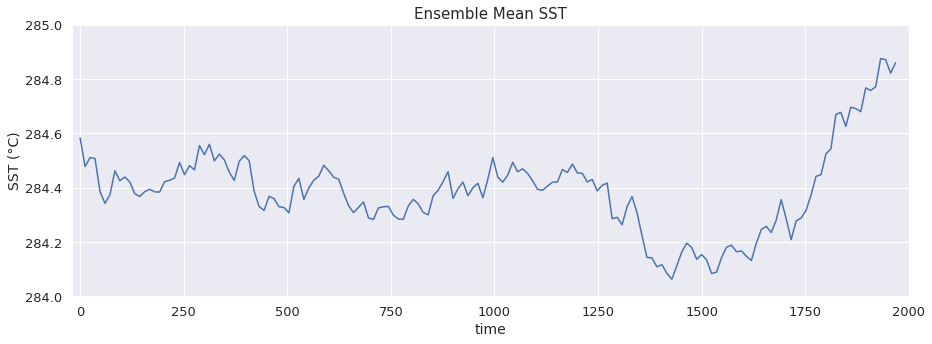

In [9]:
plt.rcParams["figure.figsize"] = (15,5)

plt.title('Ensemble Mean SST',fontsize=15)
plt.plot(time_scale, ensemble_mean_SST)
plt.xlim(-20,2000); plt.ylim(284,285)
plt.xlabel('time',fontsize=14); plt.ylabel('SST (°C)',fontsize=14)
plt.xticks(fontsize=13, rotation=0); plt.yticks(fontsize=13, rotation=0)
plt.show()

### SST Ensemble Members

In [10]:
SST_full = xr.open_dataset('SST_first10.nc')
first_10_members_SST = SST_full.isel(member_id = [0,1,2,3,4,5,6,7,8,9])
# first_10_members_SST

In [11]:
first_10_members_SST_new = first_10_members_SST.where((first_10_members_SST.lat >= lat_lim_less) & (first_10_members_SST.lat <= lat_lim_great) 
                        &(first_10_members_SST.lon >= lon_lim_less) & (first_10_members_SST.lon <= lon_lim_great),drop=True)

In [12]:
first_10_members_SST_new_nans = first_10_members_SST_new.SST.where(first_10_members_SST_new.SST != 0)

1968


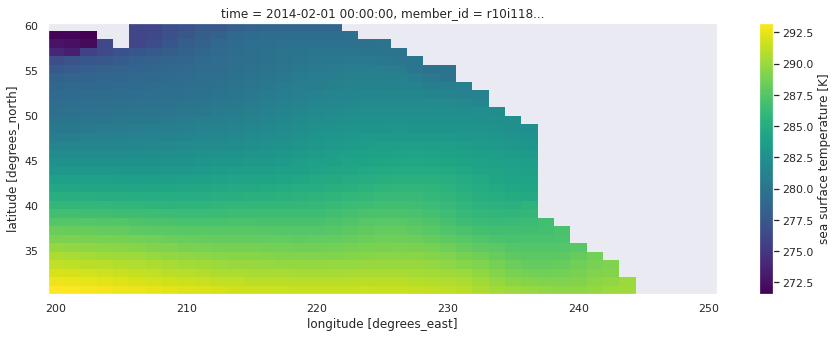

In [13]:
first_10_members_SST_new_nans[0,i,:,:].plot()
print(i)

In [14]:
first_10_members_SST_new = first_10_members_SST_new_nans

In [15]:
full_mean_SST = []; full_max_SST = []; full_min_SST = []; full_time_scale_SST = []

for j in range(0,10):
    mean_SST = []; max_SST = []; min_SST = []; time_scale_SST = []
    for i in range(0,1980,12): 
        time_scale_SST.append(i)
        timed_SST = first_10_members_SST_new[j, i, :, :]
        mean = np.nanmean(timed_SST); mean_SST.append(mean)
        maximum = np.nanmax(timed_SST); max_SST.append(maximum)
        minimum = np.nanmin(timed_SST); min_SST.append(minimum)
    full_mean_SST.append(mean_SST)
    full_max_SST.append(max_SST)
    full_min_SST.append(min_SST)
    full_time_scale_SST.append(time_scale_SST)

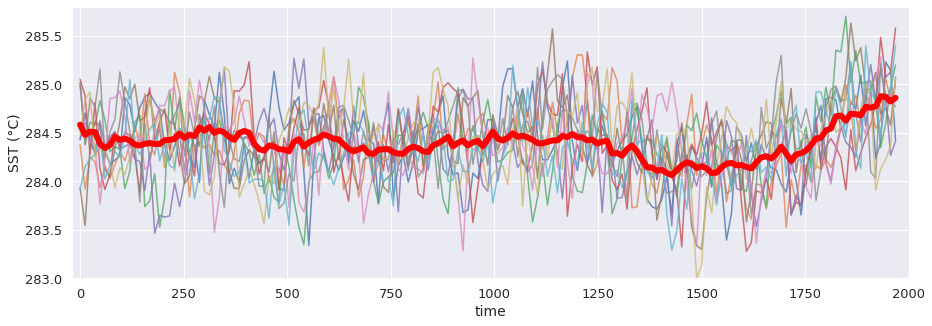

In [16]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(full_time_scale_SST[0], full_mean_SST[0],alpha=0.8)
plt.plot(full_time_scale_SST[1], full_mean_SST[1],alpha=0.8)
plt.plot(full_time_scale_SST[2], full_mean_SST[2],alpha=0.8)
plt.plot(full_time_scale_SST[3], full_mean_SST[3],alpha=0.8)
plt.plot(full_time_scale_SST[4], full_mean_SST[4],alpha=0.8)
plt.plot(full_time_scale_SST[5], full_mean_SST[5],alpha=0.8)
plt.plot(full_time_scale_SST[6], full_mean_SST[6],alpha=0.8)
plt.plot(full_time_scale_SST[7], full_mean_SST[7],alpha=0.8)
plt.plot(full_time_scale_SST[8], full_mean_SST[8],alpha=0.8)
plt.plot(full_time_scale_SST[9], full_mean_SST[9],alpha=0.8)

plt.plot(time_scale, ensemble_mean_SST,linewidth=6,color='red')

plt.xlim(-20,2000); plt.ylim(283,285.8)
plt.xlabel('time',fontsize=14); plt.ylabel('SST (°C)',fontsize=14)
plt.xticks(fontsize=13, rotation=0); plt.yticks(fontsize=13, rotation=0)
plt.show()

### SSTA Ensemble Members

In [17]:
SSTA_full = xr.open_dataset('/glade/work/cassiacai/SSTA_full.nc')
first_10_members_SSTA = SSTA_full.isel(member_id = [0,1,2,3,4,5,6,7,8,9])
# first_10_members_SSTA

In [18]:
first_10_members_SSTA_new = first_10_members_SSTA.where((first_10_members_SSTA.lat >= lat_lim_less) & (first_10_members_SSTA.lat <= lat_lim_great) 
                        &(first_10_members_SSTA.lon >= lon_lim_less) & (first_10_members_SSTA.lon <= lon_lim_great),drop=True)

In [19]:
first_10_members_SSTA_new

<xarray.Dataset>
Dimensions:    (member_id: 10, time: 1980, lat: 32, lon: 41)
Coordinates:
  * lat        (lat) float64 30.63 31.57 32.51 33.46 ... 57.02 57.96 58.9 59.84
  * lon        (lon) float64 200.0 201.2 202.5 203.8 ... 246.2 247.5 248.8 250.0
  * time       (time) object 1850-02-01 00:00:00 ... 2015-01-01 00:00:00
  * member_id  (member_id) object 'r10i1181p1f1' ... 'r14i1251p1f2'
Data variables:
    SST        (member_id, time, lat, lon) float32 -0.5668 -0.6222 ... 0.0 0.0

0


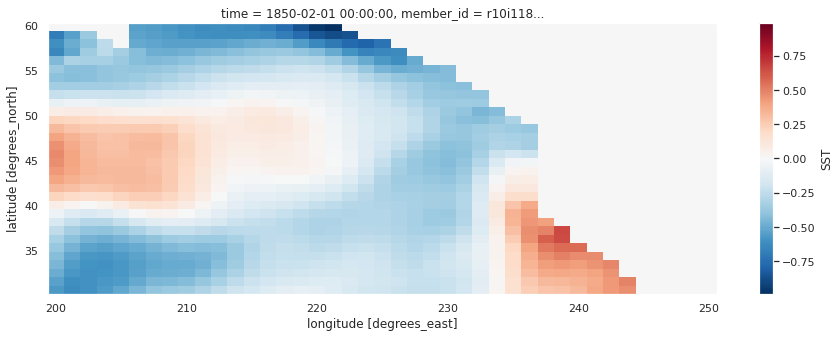

In [20]:
i = 0
first_10_members_SSTA_new.SST[0,0,:,:].plot()
print(i)

In [21]:
full_mean_SSTA = []; full_max_SSTA = []; full_min_SSTA = []; full_time_scale_SSTA = []

for j in range(0,10):
    mean_SSTA = []; max_SSTA = []; min_SSTA = []; time_scale_SSTA = []
    for i in range(0,1980,12): 
        time_scale_SSTA.append(i)
        timed_SSTA = first_10_members_SSTA_new.SST[j, i, :, :]
        mean = np.nanmean(timed_SSTA); mean_SSTA.append(mean)
        maximum = np.nanmax(timed_SSTA); max_SSTA.append(maximum)
        minimum = np.nanmin(timed_SSTA); min_SSTA.append(minimum)
    full_mean_SSTA.append(mean_SSTA)
    full_max_SSTA.append(max_SSTA)
    full_min_SSTA.append(min_SSTA)
    full_time_scale_SSTA.append(time_scale_SSTA)

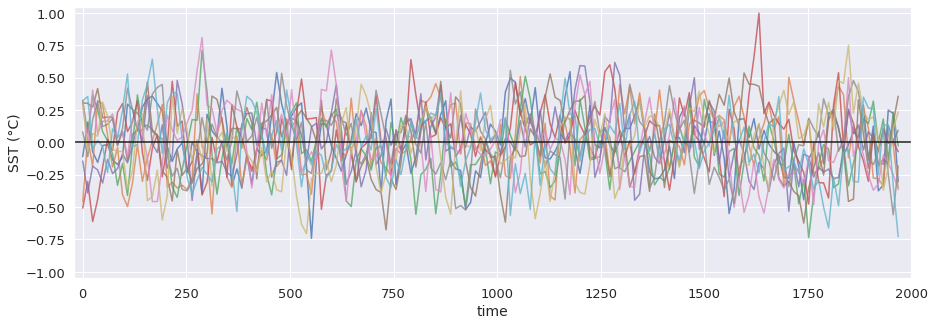

In [22]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(full_time_scale_SSTA[0], full_mean_SSTA[0],alpha=0.8)
plt.plot(full_time_scale_SSTA[1], full_mean_SSTA[1],alpha=0.8)
plt.plot(full_time_scale_SSTA[2], full_mean_SSTA[2],alpha=0.8)
plt.plot(full_time_scale_SSTA[3], full_mean_SSTA[3],alpha=0.8)
plt.plot(full_time_scale_SSTA[4], full_mean_SSTA[4],alpha=0.8)
plt.plot(full_time_scale_SSTA[5], full_mean_SSTA[5],alpha=0.8)
plt.plot(full_time_scale_SSTA[6], full_mean_SSTA[6],alpha=0.8)
plt.plot(full_time_scale_SSTA[7], full_mean_SSTA[7],alpha=0.8)
plt.plot(full_time_scale_SSTA[8], full_mean_SSTA[8],alpha=0.8)
plt.plot(full_time_scale_SSTA[9], full_mean_SSTA[9],alpha=0.8)

plt.xlim(-20,2000); plt.ylim(-1.05,1.05)
plt.axhline(y=0, color='k')
plt.xlabel('time',fontsize=14); plt.ylabel('SST (°C)',fontsize=14)
plt.xticks(fontsize=13, rotation=0); plt.yticks(fontsize=13, rotation=0)
plt.show()

### Ocetrac Output

In [23]:
%%time

all_blob_files = []
all_combined_files = []
all_combined_NEP_files = [] 
all_events_NEP = []

for i in range(0,10):
    blobs_ens_num = 'blobs_ens_{}_rad4.nc'.format(i)
    new_blob_file_open = xr.open_dataset(str(blobs_ens_num))
    all_blob_files.append(new_blob_file_open)
    
    combined = xr.combine_by_coords([first_10_members_SSTA.isel(member_id = i),new_blob_file_open])
    all_combined_files.append(combined)
    
    combined_NEP = combined.where((combined.lat >= lat_lim_less) & (combined.lat <= lat_lim_great)&(combined.lon >= lon_lim_less) & (combined.lon <= lon_lim_great),drop=True)
    all_combined_NEP_files.append(combined_NEP)
    
    event_NEP = combined_NEP.groupby(combined_NEP.labels)
    all_events_NEP.append(event_NEP)

CPU times: user 4.6 s, sys: 1.55 s, total: 6.15 s
Wall time: 9.32 s


In [24]:
print(all_combined_NEP_files[0])

<xarray.Dataset>
Dimensions:    (time: 1980, lat: 32, lon: 41)
Coordinates:
  * lat        (lat) float64 30.63 31.57 32.51 33.46 ... 57.02 57.96 58.9 59.84
  * lon        (lon) float64 200.0 201.2 202.5 203.8 ... 246.2 247.5 248.8 250.0
  * time       (time) object 1850-02-01 00:00:00 ... 2015-01-01 00:00:00
    member_id  <U12 'r10i1181p1f1'
    quantile   float64 0.9
    month      (time) int64 2 3 4 5 6 7 8 9 10 11 12 ... 4 5 6 7 8 9 10 11 12 1
Data variables:
    SST        (time, lat, lon) float32 -0.5668 -0.6222 -0.5995 ... 0.0 0.0 0.0
    labels     (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan


In [25]:
%%time

import datetime as dt

full_dfs = []; full_xarrays = []

for i in range(len(all_events_NEP)):
    file = all_events_NEP[i]

    label_ls = []; time_begin_ls = []; time_end_ls = []; duration_ls = []; 
    intense_mean = []; intense_max = []; intense_min = [];intense_cumu = []
    coords_ls = []; cell_area_ls = []; lat_ls = []; lon_ls = []

    for l, ent in file:        
        label_ls.append(l)
        groupedby_by_time = ent.groupby(ent.time)
        time_begin = str(ent.time[0].values); time_begin_ls.append(time_begin)
        time_end = str(ent.time[-1].values); time_end_ls.append(time_end)
        
        duration = len(ent.groupby("time")); duration_ls.append(duration)

        temp_intense_mean = []; temp_intense_max = []; temp_intense_min = []; temp_intense_cumu = []
        temp_coords = []; temp_cell_area = []; temp_lat = []; temp_lon = []
        for n, gro in groupedby_by_time:
            lat = gro.lat.values
            lon = gro.lon.values
            time = gro.time.values
                        
            intensity_mean_val = gro['SST'].values.mean(); temp_intense_mean.append(intensity_mean_val)
            intensity_max_val = gro['SST'].values.max(); temp_intense_max.append(intensity_max_val)
            intensity_min_val = gro['SST'].values.min(); temp_intense_min.append(temp_intense_min)
            intensity_cumulative_val = gro['SST'].values.sum(); temp_intense_cumu.append(intensity_cumulative_val)

            coords = list(zip(lat, lon)); temp_coords.append(coords)
            # print(len(coords))
            temp_lat.append(lat); temp_lon.append(lon)
            y,x=zip(*coords)
            dlon = [np.cos(y[c]*np.pi/180)*(111.320*1) for c in np.arange(0, len(coords))]
            dlat = (110.574 *1) * np.ones(len(dlon))
            cell_area = [np.sum(dlon[c]*dlat[c]) for c in np.arange(0, len(coords))]; temp_cell_area.append(np.sum(cell_area))
            # print(len(cell_area))
            # print('***')
        intense_mean.append(temp_intense_mean)
        intense_max.append(temp_intense_max)
        intense_min.append(temp_intense_min) 
        intense_cumu.append(temp_intense_cumu)
        coords_ls.append(temp_coords)
        cell_area_ls.append(temp_cell_area)
        lat_ls.append(temp_lat)
        lon_ls.append(temp_lon)
        
        begin_dates_list = [dt.datetime.strptime(date, '%Y-%m-%d %H:%M:%S').date() for date in time_begin_ls]
        
        end_dates_list = [dt.datetime.strptime(date, '%Y-%m-%d %H:%M:%S').date() for date in time_end_ls]
        
    my_df = pd.DataFrame(zip(label_ls, begin_dates_list, end_dates_list, duration_ls,
                            intense_mean, intense_max, intense_min, intense_cumu,
                            coords_ls, cell_area_ls, lat_ls, lon_ls), columns = ['label', 'time_begin', 'time_end', 'duration',
                                                              'intense_mean', 'intense_max', 'intense_min','intense_cumu',
                                                              'coords','cell_area','lat','lon'])
    my_xarray = my_df.to_xarray() 
    
    full_dfs.append(my_df)
    full_xarrays.append(my_xarray)

CPU times: user 31.8 s, sys: 125 ms, total: 32 s
Wall time: 32.5 s


### Data Analysis

In [26]:
%%time
# filter for heatwaves that last 5 months or longer
filt_full_xarrays = []
for i in range(len(full_xarrays)):
    using_array = full_xarrays[i]
    temp = using_array.where((using_array.duration >= 5),drop=True)
    filt_full_xarrays.append(temp)

CPU times: user 6.65 s, sys: 83.1 ms, total: 6.73 s
Wall time: 6.84 s


In [27]:
%%time
# filter for heatwaves that last 17 months or longer
filt_full_xarrays_17 = []
for i in range(len(full_xarrays)):
    using_array = full_xarrays[i]
    temp = using_array.where((using_array.duration >= 17),drop=True)
    filt_full_xarrays_17.append(temp)

CPU times: user 6.89 s, sys: 67.1 ms, total: 6.95 s
Wall time: 7.34 s


In [28]:
%%time
print(len(filt_full_xarrays))
print(len(filt_full_xarrays_17))

10
10
CPU times: user 59 µs, sys: 0 ns, total: 59 µs
Wall time: 61.5 µs


In [29]:
### Selecting data example
one_event = filt_full_xarrays[0].isel(index = 2)
print(one_event.intense_cumu.values)
x_axis = np.arange(1, one_event.duration.values+1, 1)

[16.640045, 89.88422, 142.93213, 214.13257, 572.8706, 593.676]


In [30]:
%%time

full_char_df = []

maximums_all = []; means_all = []; cumulatives_all = []; max_cell_area_all = []; duration_all = []

for m in range(len(filt_full_xarrays)):
    xarray_using = filt_full_xarrays[m]
    
    maximums = []; means = []; cumulatives = []; max_cell_area = []; durations = []
    for i in range(len(xarray_using.intense_max)):
        maximums.append(np.nanmax(xarray_using.intense_max[i].item())); maximums_all.append(np.nanmax(xarray_using.intense_max[i].item()))
        means.append(np.nanmax(xarray_using.intense_mean[i].item())); means_all.append(np.nanmax(xarray_using.intense_mean[i].item()))
        cumulatives.append(np.nanmax(xarray_using.intense_cumu[i].item())); cumulatives_all.append(np.nanmax(xarray_using.intense_cumu[i].item()))
        max_cell_area.append(np.nanmax(xarray_using.cell_area[i].item())); max_cell_area_all.append(np.nanmax(xarray_using.cell_area[i].item()))
        durations.append(xarray_using.duration[i].item()); duration_all.append(xarray_using.duration[i].item())
        
    char_df = pd.DataFrame(zip(maximums, means, cumulatives, max_cell_area, durations), columns = ['intensity_max', 'intensity_mean', 'intensity_total', 'max_tot_cell_area','duration'])
    full_char_df.append(char_df)

CPU times: user 780 ms, sys: 3 ms, total: 783 ms
Wall time: 784 ms


In [31]:
max_all_q1 = np.quantile(maximums_all, 0.25)
max_all_q2 = np.quantile(maximums_all, 0.5)
max_all_q3 = np.quantile(maximums_all, 0.75)

mean_all_q1 = np.quantile(means_all, 0.25)
mean_all_q2 = np.quantile(means_all, 0.5)
mean_all_q3 = np.quantile(means_all, 0.75)

ic_all_q1 = np.quantile(cumulatives_all, 0.25)
ic_all_q2 = np.quantile(cumulatives_all, 0.5)
ic_all_q3 = np.quantile(cumulatives_all, 0.75)

mca_all_q1 = np.quantile(max_cell_area_all, 0.25)
mca_all_q2 = np.quantile(max_cell_area_all, 0.5)
mca_all_q3 = np.quantile(max_cell_area_all, 0.75)

dur_all_q1 = np.quantile(duration_all, 0.25)
dur_all_q2 = np.quantile(duration_all, 0.5)
dur_all_q3 = np.quantile(duration_all, 0.75)

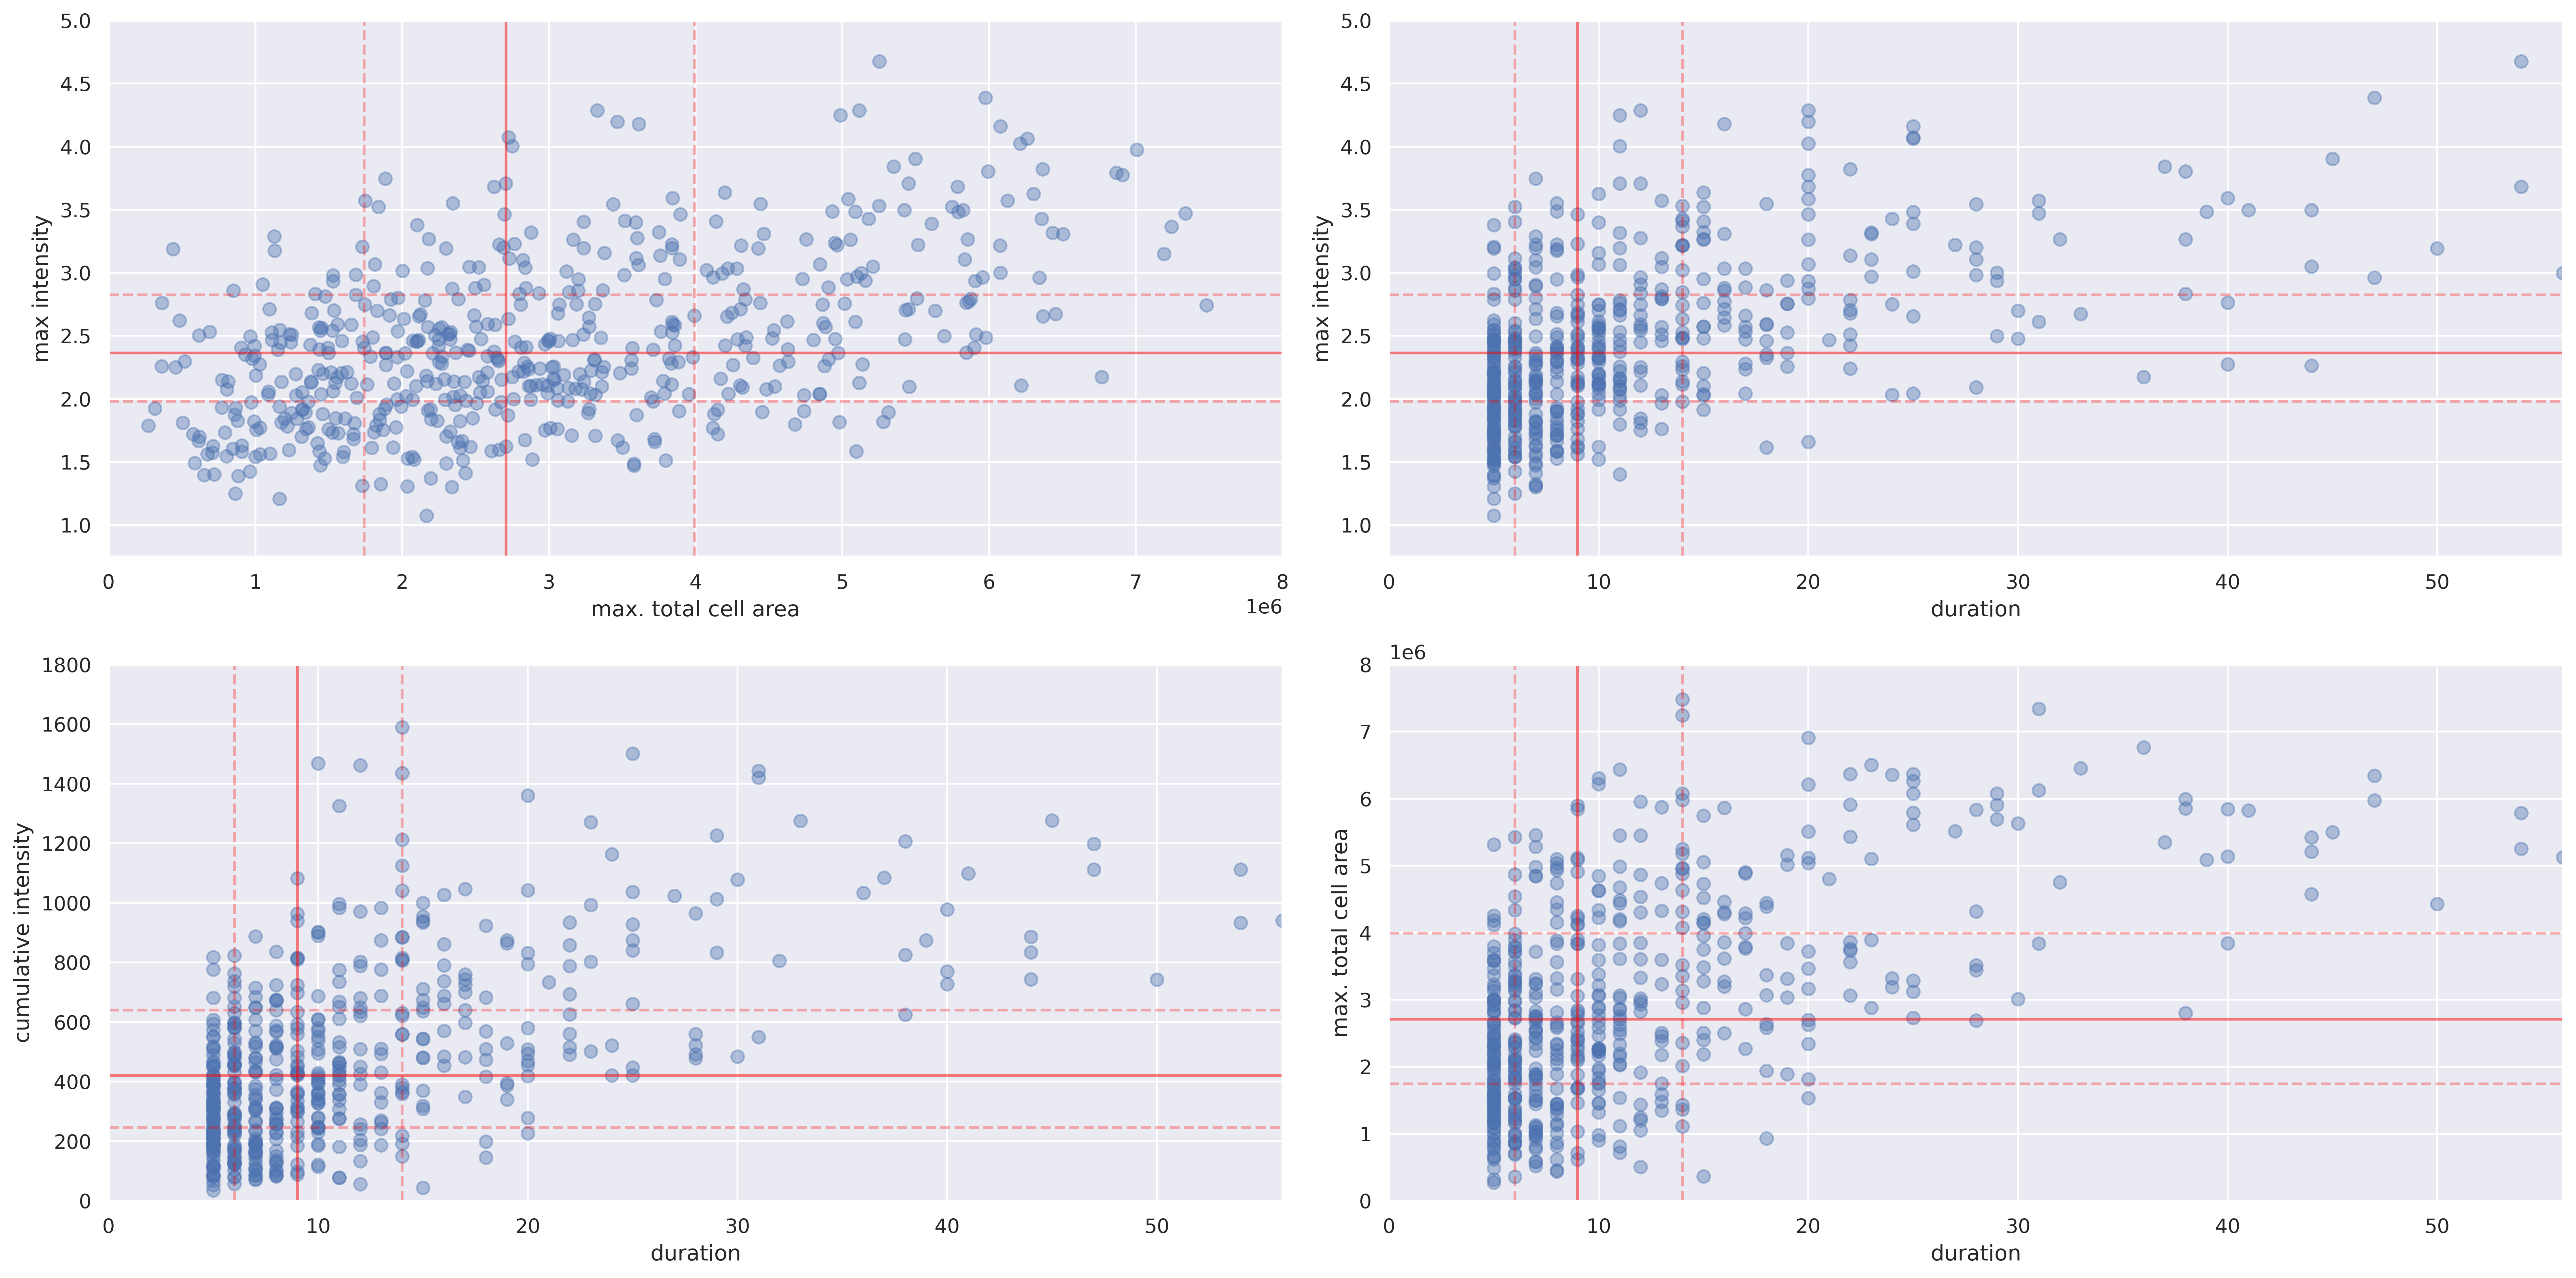

In [32]:
import scipy

fig = plt.figure(figsize=(20, 10), dpi=400)

plt.subplot(2, 2, 1)
plt.axhline(y=max_all_q1,alpha=0.3,c='red',linestyle='dashed'); plt.axhline(y=max_all_q2,alpha=0.5,c='red'); plt.axhline(y=max_all_q3,alpha=0.3,c='red',linestyle='dashed')
plt.axvline(x=mca_all_q1,alpha=0.3,c='red',linestyle='dashed'); plt.axvline(x=mca_all_q2,alpha=0.5,c='red'); plt.axvline(x=mca_all_q3,alpha=0.3,c='red',linestyle='dashed')

plt.scatter(max_cell_area_all, maximums_all,alpha=0.4, s = 50)
plt.ylabel('max intensity'); plt.xlabel('max. total cell area')
plt.xlim(0,8e6); plt.ylim(0.75,5)

# --------------------------------------------------------------
plt.subplot(2, 2, 2)
plt.axhline(y=max_all_q1,alpha=0.3,c='red',linestyle='dashed'); plt.axhline(y=max_all_q2,alpha=0.5,c='red'); plt.axhline(y=max_all_q3,alpha=0.3,c='red',linestyle='dashed')
plt.axvline(x=dur_all_q1,alpha=0.3,c='red',linestyle='dashed'); plt.axvline(x=dur_all_q2,alpha=0.5,c='red'); plt.axvline(x=dur_all_q3,alpha=0.3,c='red',linestyle='dashed')

plt.scatter(duration_all, maximums_all ,alpha=0.4, s = 50)
plt.ylabel('max intensity'); plt.xlabel('duration')
plt.xlim(0,dur_all_q3*4); plt.ylim(0.75,5)

# --------------------------------------------------------------
plt.subplot(2, 2, 3)
plt.axhline(y=ic_all_q1,alpha=0.3,c='red', linestyle='dashed'); plt.axhline(y=ic_all_q2,alpha=0.5,c='red'); plt.axhline(y=ic_all_q3,alpha=0.3,c='red', linestyle='dashed')
plt.axvline(x=dur_all_q1,alpha=0.3,c='red', linestyle='dashed'); plt.axvline(x=dur_all_q2,alpha=0.5,c='red'); plt.axvline(x=dur_all_q3,alpha=0.3,c='red',linestyle='dashed')

plt.scatter(duration_all, cumulatives_all ,alpha=0.4, s = 50)
plt.ylabel('cumulative intensity'); plt.xlabel('duration')
plt.xlim(0,dur_all_q3*4); plt.ylim(0,1800)
# --------------------------------------------------------------
plt.subplot(2, 2, 4)
plt.axhline(y=mca_all_q1,alpha=0.3,c='red', linestyle='dashed'); plt.axhline(y=mca_all_q2,alpha=0.5,c='red'); plt.axhline(y=mca_all_q3,alpha=0.3,c='red', linestyle='dashed')
plt.axvline(x=dur_all_q1,alpha=0.3,c='red', linestyle='dashed'); plt.axvline(x=dur_all_q2,alpha=0.5,c='red'); plt.axvline(x=dur_all_q3,alpha=0.3,c='red',linestyle='dashed')

plt.scatter(duration_all, max_cell_area_all ,alpha=0.4, s = 50)
plt.ylabel('max. total cell area'); plt.xlabel('duration')
plt.ylim(0,8e6); plt.xlim(0,dur_all_q3*4);

plt.tight_layout()
plt.show()

In [43]:
# duration and maximum intensity
data_tuples = list(zip(duration_all,maximums_all, max_cell_area_all, cumulatives_all))
data_df = pd.DataFrame(data_tuples, columns=['duration','intensity_max','max_cell_area_all','cumulative_intensity'])
sorted_df = data_df.sort_values(by = 'duration')

### IDF curves

In [44]:
%%time
grouped_df_mean = sorted_df.groupby('duration').mean()
grouped_df_std = sorted_df.groupby('duration').std()

CPU times: user 3.29 ms, sys: 0 ns, total: 3.29 ms
Wall time: 28.7 ms


In [61]:
freq_count_dur = sorted_df['duration'].value_counts(normalize=True)
print(freq_count_dur.values)

[0.18435754 0.13221601 0.09310987 0.0726257  0.0689013  0.06703911
 0.05214153 0.03910615 0.03351955 0.02979516 0.02420857 0.02420857
 0.01675978 0.01675978 0.01489758 0.01489758 0.01489758 0.01117318
 0.00931099 0.00744879 0.00558659 0.00558659 0.00558659 0.00558659
 0.00558659 0.00558659 0.00372439 0.00372439 0.00372439 0.0018622
 0.0018622  0.0018622  0.0018622  0.0018622  0.0018622  0.0018622
 0.0018622  0.0018622  0.0018622  0.0018622  0.0018622  0.0018622
 0.0018622  0.0018622 ]


In [94]:
# normalizing
def NormalizeData(data):
    return (data - np.nanmin(data)) / (np.nanmax(data) - np.nanmin(data))

normalized = NormalizeData(grouped_df_std.intensity_max.values)

In [95]:
print(normalized)

[0.33230078 0.39317676 0.4940801  0.45939326 0.35487963 0.31882312
 0.59938051 0.58322681 0.40770989 0.40291081 0.5135385  0.39698949
 0.18541312 0.4534736  0.12269052 0.65072205        nan 0.39789894
 0.01415318 0.63449239 0.70516533        nan 0.45179003 0.13761265
 0.         0.43500254        nan        nan        nan        nan
 0.38689799        nan 0.59927803        nan 0.54925048        nan
 1.                nan 0.64064003        nan        nan        nan
        nan        nan]


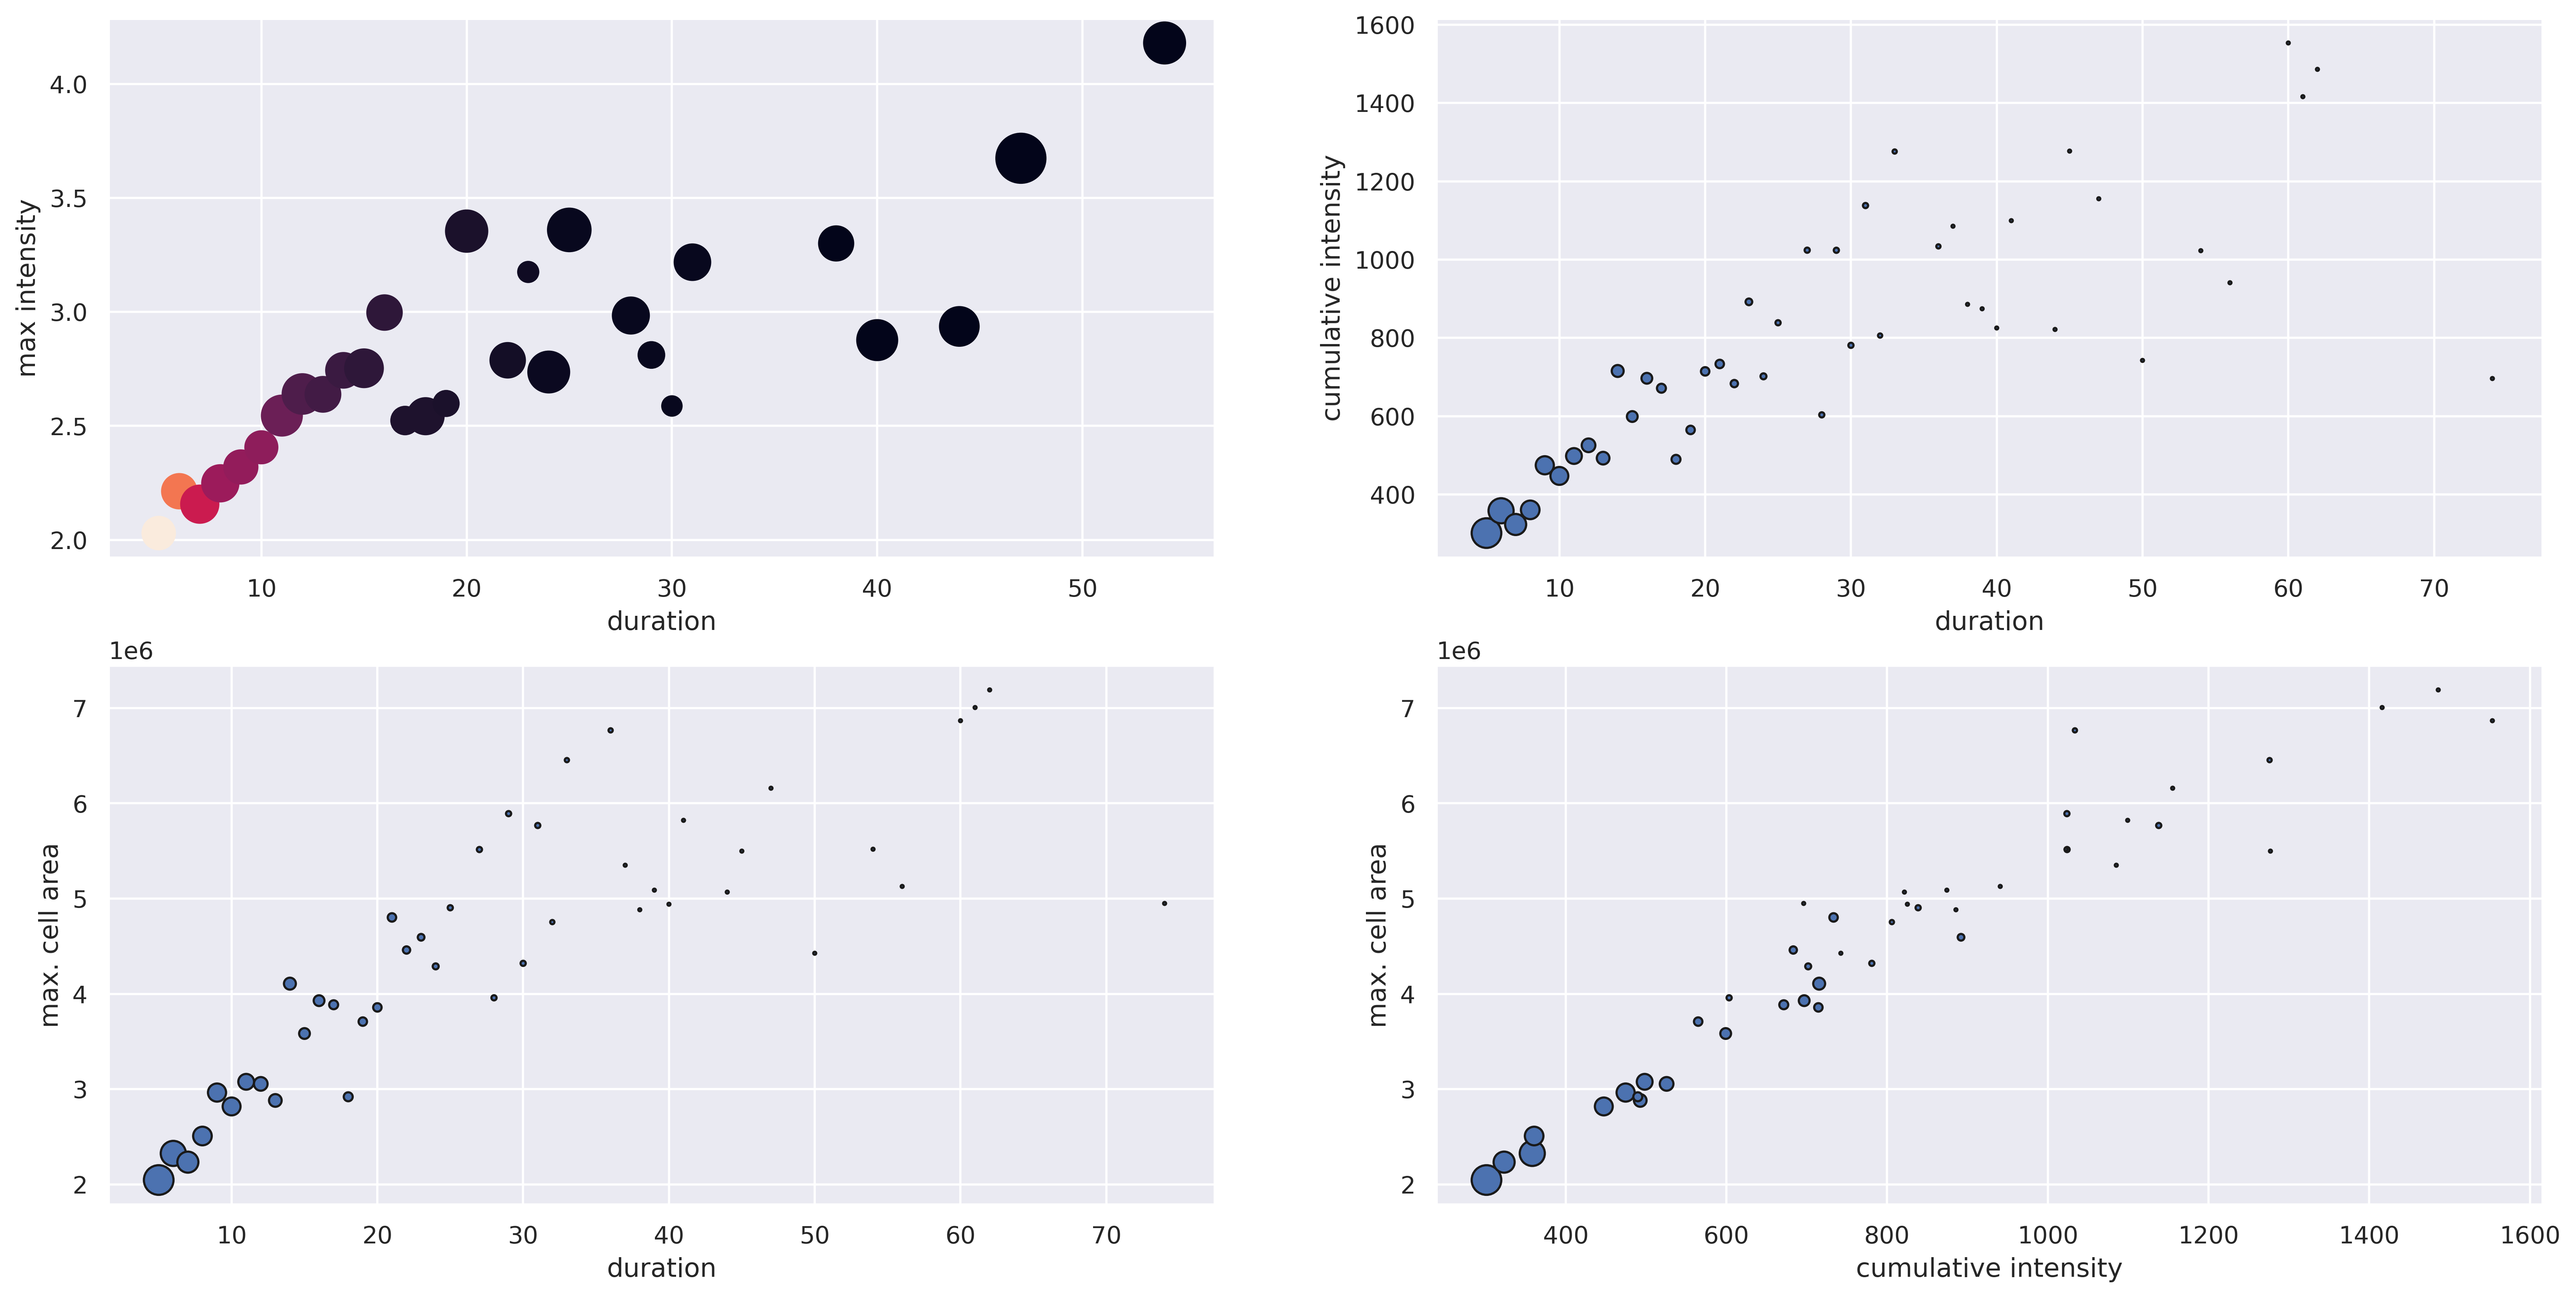

In [79]:
fig = plt.figure(figsize=(20, 10), dpi=400)

plt.subplot(2, 2, 1)
# plt.scatter(grouped_df_mean.index.values, grouped_df_mean.intensity_max.values, s=freq_count_dur.values*1000, color='k', edgecolors='k',
#            linewidths=grouped_df_std.intensity_max.values*10)
plt.scatter(grouped_df_mean.index.values, grouped_df_mean.intensity_max.values, s=freq_count_dur.values*1000,c=)
plt.xlabel('duration'); plt.ylabel('max intensity')

plt.subplot(2, 2, 2)
plt.scatter(grouped_df_mean.index.values, grouped_df_mean.cumulative_intensity.values, s=freq_count_dur.values*1000, edgecolors='k')
plt.xlabel('duration'); plt.ylabel('cumulative intensity')

plt.subplot(2, 2, 3)
plt.scatter(grouped_df_mean.index.values, grouped_df_mean.max_cell_area_all.values, s=freq_count_dur.values*1000, edgecolors='k')
plt.xlabel('duration'); plt.ylabel('max. cell area')

plt.subplot(2, 2, 4)
plt.scatter(grouped_df_mean.cumulative_intensity.values, grouped_df_mean.max_cell_area_all.values, s=freq_count_dur.values*1000, edgecolors='k')
plt.xlabel('cumulative intensity'); plt.ylabel('max. cell area')

plt.show()

In [ ]:
grouped_df_std.intensity_max.values

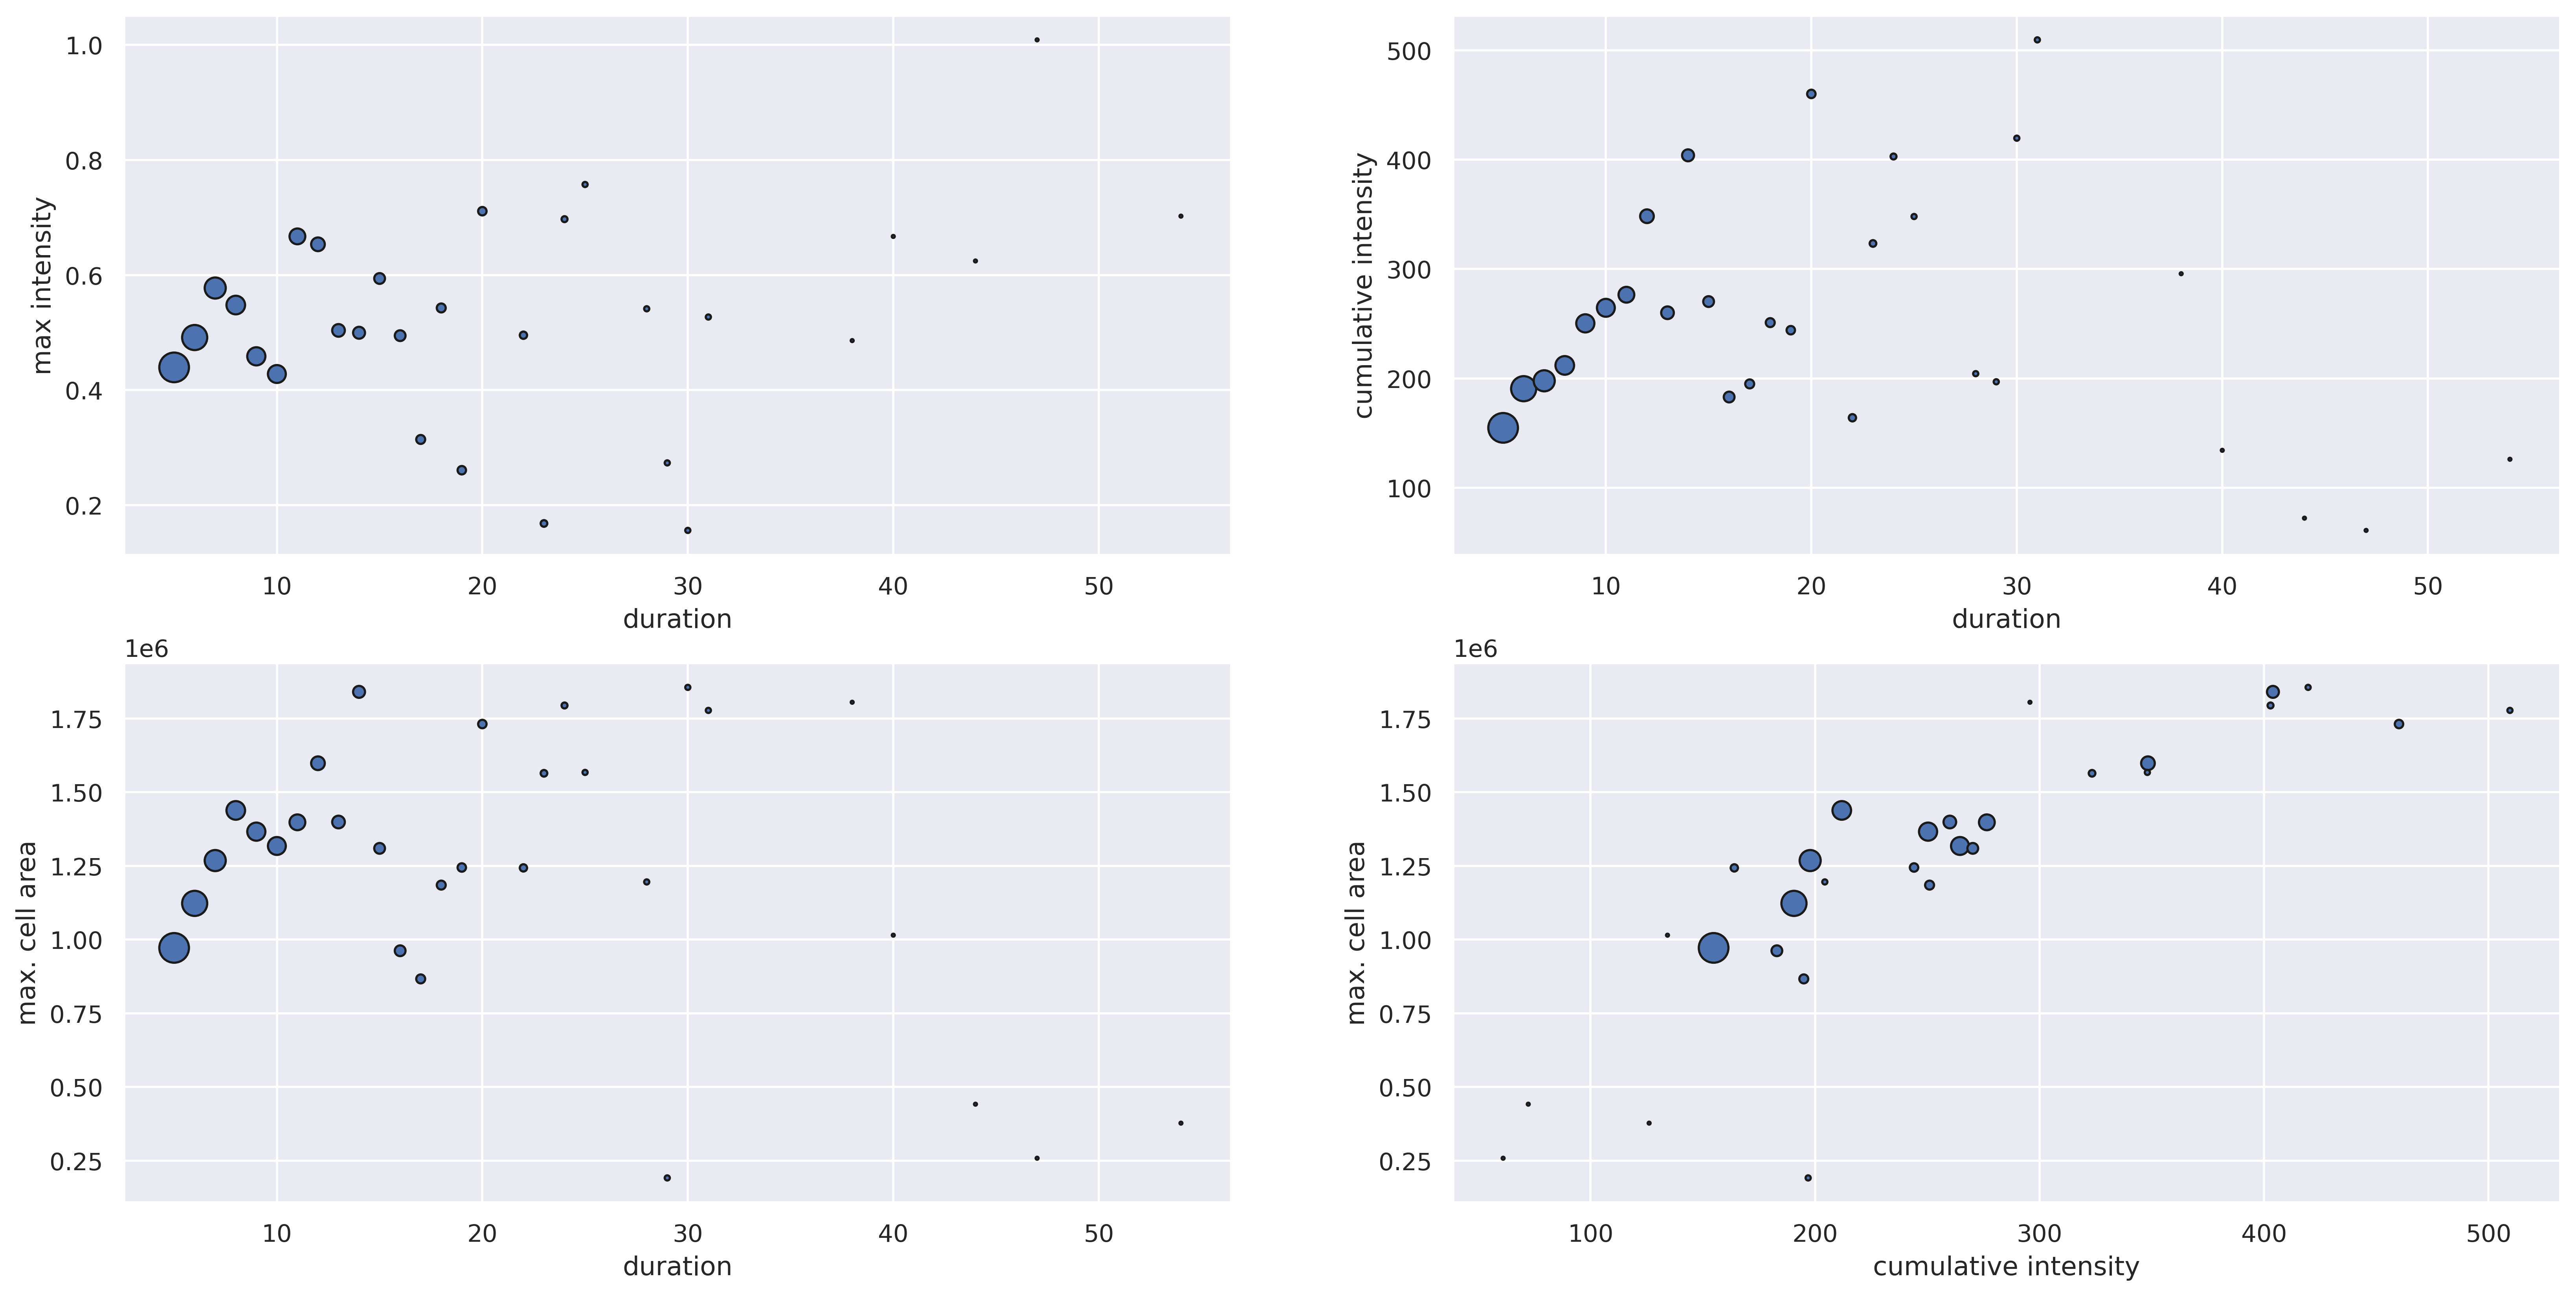

In [68]:
fig = plt.figure(figsize=(20, 10), dpi=400)

plt.subplot(2, 2, 1)
plt.scatter(grouped_df_mean.index.values, grouped_df_std.intensity_max.values, s=freq_count_dur.values*1000, edgecolors='k')
plt.xlabel('duration'); plt.ylabel('max intensity')

plt.subplot(2, 2, 2)
plt.scatter(grouped_df_mean.index.values, grouped_df_std.cumulative_intensity.values, s=freq_count_dur.values*1000, edgecolors='k')
plt.xlabel('duration'); plt.ylabel('cumulative intensity')

plt.subplot(2, 2, 3)
plt.scatter(grouped_df_mean.index.values, grouped_df_std.max_cell_area_all.values, s=freq_count_dur.values*1000, edgecolors='k')
plt.xlabel('duration'); plt.ylabel('max. cell area')

plt.subplot(2, 2, 4)
plt.scatter(grouped_df_mean.cumulative_intensity.values, grouped_df_std.max_cell_area_all.values, s=freq_count_dur.values*1000, edgecolors='k')
plt.xlabel('cumulative intensity'); plt.ylabel('max. cell area')

plt.show()

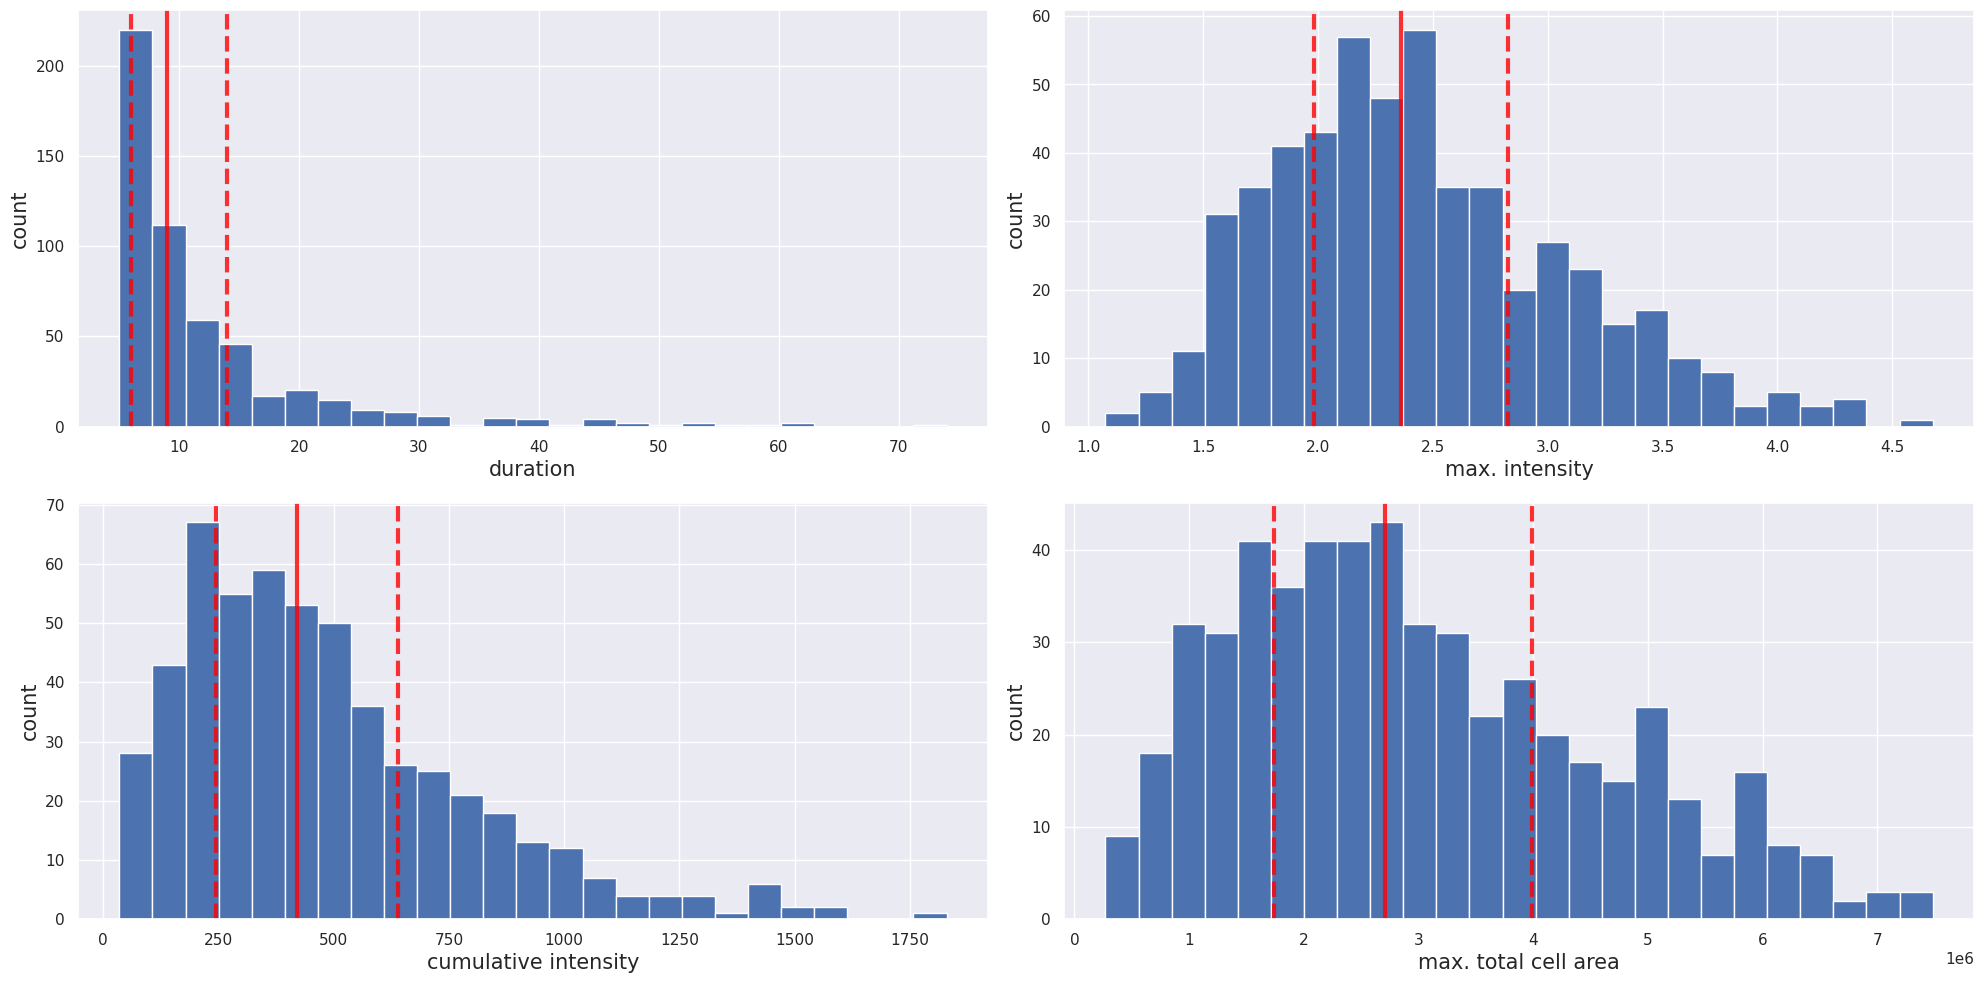

In [33]:
# histograms

fig = plt.figure(figsize=(20, 10), dpi=100)

plt.subplot(2, 2, 1)
plt.hist(duration_all, bins =25)
plt.xlabel('duration', fontsize=15); plt.ylabel('count', fontsize=15)
plt.axvline(dur_all_q1,alpha=0.8,c='red', linestyle='dashed',linewidth=3)
plt.axvline(dur_all_q2,alpha=0.8,c='red',linewidth=3)
plt.axvline(dur_all_q3,alpha=0.8,c='red', linestyle='dashed',linewidth=3)

plt.subplot(2, 2, 2)
plt.hist(maximums_all, bins =25)
plt.xlabel('max. intensity', fontsize=15); plt.ylabel('count', fontsize=15)
plt.axvline(max_all_q1,alpha=0.8,c='red', linestyle='dashed',linewidth=3)
plt.axvline(max_all_q2,alpha=0.8,c='red',linewidth=3)
plt.axvline(max_all_q3,alpha=0.8,c='red', linestyle='dashed',linewidth=3)

plt.subplot(2, 2, 3)
plt.hist(cumulatives_all, bins =25)
plt.xlabel('cumulative intensity', fontsize=15); plt.ylabel('count', fontsize=15)
plt.axvline(ic_all_q1,alpha=0.8,c='red', linestyle='dashed',linewidth=3)
plt.axvline(ic_all_q2,alpha=0.8,c='red',linewidth=3)
plt.axvline(ic_all_q3,alpha=0.8,c='red', linestyle='dashed',linewidth=3)

plt.subplot(2, 2, 4)
plt.hist(max_cell_area_all, bins =25)
plt.xlabel('max. total cell area', fontsize=15); plt.ylabel('count', fontsize=15)
plt.axvline(mca_all_q1,alpha=0.8,c='red', linestyle='dashed',linewidth=3)
plt.axvline(mca_all_q2,alpha=0.8,c='red',linewidth=3)
plt.axvline(mca_all_q3,alpha=0.8,c='red', linestyle='dashed',linewidth=3)

plt.tight_layout()
plt.show()

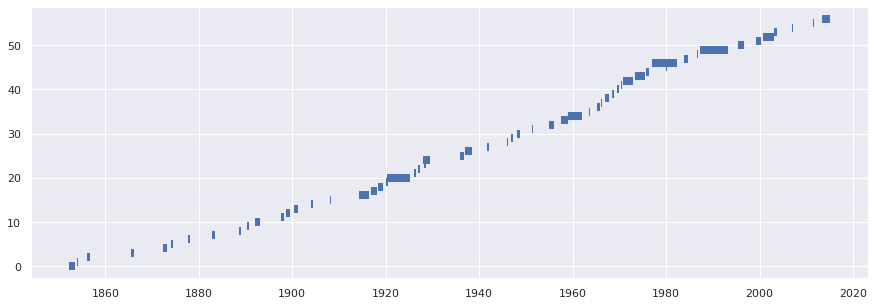

In [34]:
import matplotlib.dates as dt
i = 1
inde = np.arange(0,len(filt_full_xarrays[i].time_begin.values),1)
fig, ax = plt.subplots(figsize=(15, 5))
ax = ax.xaxis_date()
ax = plt.hlines(inde, filt_full_xarrays[i].time_begin.values, filt_full_xarrays[i].time_end.values,linewidth=8)


### Scratch work

In [ ]:
# import datetime
# dtDate = datetime.datetime.strptime("07/27/2012", "%m/%d/%Y")

In [ ]:
# dates_list = [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S').date() for date in time_begin_ls]

In [ ]:
# time_dur = np.arange(0,223,1)
# print(time_dur)

In [ ]:
# plt.plot(dates_list, time_dur)
# full_dfs[0].duration
# print(time_begin_ls)

In [ ]:
# import matplotlib.dates as dt

# xr_ = full_xarrays[0]

# fig, ax = plt.subplots(figsize=(8, 5))
# ax = ax.xaxis_date()
# ax = plt.hlines(xr_.index, xr_.time_begin, xr_.time_end)

In [ ]:
# xr_zer = full_xarrays[0].load()

In [ ]:
# xr_zer

In [ ]:
# xr_zer.intense_mean[0]

In [ ]:
# xr_zer.index[0]